In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 11 10:34:50 2021

This code refers to:
    
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/


@author: Ziyang Xie
"""

from random import seed
from random import random
from random import randrange
from math import exp, sqrt
import numpy as np
import collections
import matplotlib.pyplot as plt

In [2]:
'''
K-nearest neighbor basically includes three steps:
    1, Calculate Euclidean Distance
    2, Get Nearest Neighbors
    3, Make predictions

We first calculate the Euclidean Distance (https://en.wikipedia.org/wiki/Euclidean_distance):
'''
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1) - 1):
        distance += (row1[i] - row2[i]) ** 2 # the last column is an output value
    return sqrt(distance)

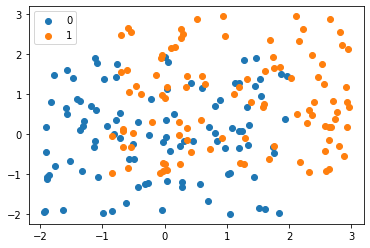

In [3]:
def plot_data(dataset,color = 'r'):
    d = collections.defaultdict(list)
    for x, y, data_type in dataset:
        d[data_type].append([x,y])
    for key in d.keys():
        data = np.transpose(np.array(d[key]))
        plt.scatter(data[0],data[1], label = key)
    plt.legend()

seed(1)
x1_base, y1_base, x2_base, y2_base = 0, 0, 1, 1
x1_rand, y1_rand, x2_rand, y2_rand = 4, 4, 4, 4
type_1data = [[x1_base + (random() - 0.5) * x1_rand, y1_base + (random() - 0.5) * y1_rand, 0] for _ in range(100)]
type_2data = [[x2_base + (random() - 0.5) * x2_rand, y2_base + (random() - 0.5) * y2_rand, 1] for _ in range(100)]
dataset =  type_1data + type_2data
row0 = dataset[0]
plot_data(dataset)


In [4]:
for row in dataset:
    distance = euclidean_distance(row0, row)
    print(distance)

0.0
3.457289970041101
2.149346036232006
2.082200632411307
3.2803485894449262
3.25923086029793
4.212091533064802
1.3421445540500683
0.5438095043361539
4.482177491880469
1.2993058349095463
3.7203197954636282
1.7327772303886804
2.5381762570668926
1.8580165762510266
2.4976814385830415
1.5876448682856903
3.36175692755988
3.0441513018330526
3.3361333319840796
3.433081541608997
2.0596595167833716
2.410881863524682
3.6314829867363967
2.8714683462561412
1.2399102663455233
2.992463113102294
1.808283878250581
2.4515211812751962
3.167875637191615
1.2044991805074288
2.3775751021967824
1.8957307384567594
1.5214852606338634
2.385683400427568
3.566851535246937
0.6812869951674205
3.544334870149839
2.900059279239766
1.566959970488273
2.8268682546163193
3.806331162395866
1.574710424484509
2.3576568432951173
1.3137116466236543
4.708156717542647
2.5993998477311706
3.037526348711133
3.0024052627334408
2.3995116969298382
0.3257321693435822
3.121938706723468
2.072973652077634
2.1939219941328756
1.848067588522

In [5]:
'''
Step2: Get Nearest neighbors
Neighbors for a new piece of data are the k closest instances, to find the neighbors, we have to calculate
the distance between each recorded data in the dataset and the new data.
'''
def get_neighbors(train, test_row, num_neighbors):
    distances = []
    for train_row in train:
        d = euclidean_distance(test_row, train_row)
        distances.append((train_row, d))
    distances.sort(key = lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [6]:
'''
Test our algorithm
'''
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
	print(neighbor)

[-1.4625430235503951, 1.3897349477489307, 0]
[-1.5649532302183466, 1.5992740014240807, 0]
[-1.7755068099170384, 1.4800406207065593, 0]


In [7]:
'''
step 3: make predictions. The idea is simple, we find a test data's k nearest neighbors. Then, we predict this data belongs to a 
type that most of its neighbors belongs to
'''
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key = output_values.count)
    return prediction

In [8]:
'''
KNN finished, lets try it.
'''

'''
Calculate accuracy percentage
'''
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [9]:

'''
Evaluate algorithm using cross validation split
'''

'''
Apply k-folds cross validation. Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data
For more details:
https://machinelearningmastery.com/k-fold-cross-validation/
'''
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

'''
Evaluate algorithm using cross validation split
'''
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

n_folds = 5
num_neighbors = 5
scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [70.0, 72.5, 77.5, 62.5, 65.0]
Mean Accuracy: 69.500%
